In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
# Task 5.1 MiniProject
# Load the transaction_data.csv dataset. Check table size,
# variable types, number of missing values and descriptive statistics.

# Question: how many missing values are there in the dataset?

path_to_transaction_data = Path(Path.cwd(), 'transaction_data.csv')
transaction_data = pd.read_csv(path_to_transaction_data)

transaction_data.isna().sum()
# Answer - 0 missing values

date           0
name           0
transaction    0
dtype: int64

In [3]:
print('columns and rows = ', transaction_data.shape, 'respectively \n')
print(transaction_data.dtypes, '\n')
transaction_data.describe()

columns and rows =  (5315, 3) respectively 

date           object
name           object
transaction    object
dtype: object 



date           name  transaction
count                  5315           5315         5315
unique                 3373             56            3
top     2020-03-02 00:33:10  Masha_Ozerova  successfull
freq                      6            112         3692

   transaction  transactions_count
0    cancelled                1619
1        error                   4
2  successfull                3692 



<AxesSubplot:xlabel='transaction', ylabel='transactions_count'>

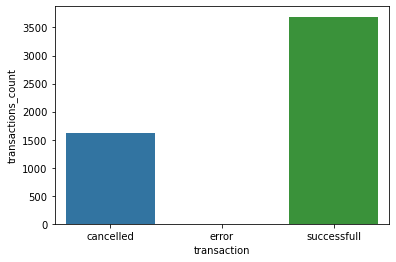

In [4]:
# Task 5.2 MiniProject
# Check what values the transaction column takes.
# How many observations belong to one level or another?
# Visualise the result with a barplot.

# Check what values the transaction column takes.
transaction_data['transaction'].unique()
# Answer: 'cancelled', 'successfull', 'error'

# How many observations belong to one level or another?
transactions_count = (
    transaction_data
    .groupby(['transaction'], as_index = False)
    .agg({'name' : 'count'})
    .rename(columns = {'name':'transactions_count'})
)
print(transactions_count, '\n')
# Visualise the result with a barplot.
sns.barplot( x = 'transaction', y = 'transactions_count', data = transactions_count)

In [5]:
# Task 5.4
# How many errors have occurred? 
# Answer - 4

In [6]:
# Task 5.5
# How many transactions have each user completed?
# Transactions with a value of successfull are considered to have been carried out.

# Look at the distribution characteristics and then draw a histogram of the number of 
# successful transactions made by each user, where on the 
# x-axis is the number of transactions
# the y-axis is the percentage of users with this number of transactions

<AxesSubplot:xlabel='successfull_transactions', ylabel='percent_of_users'>

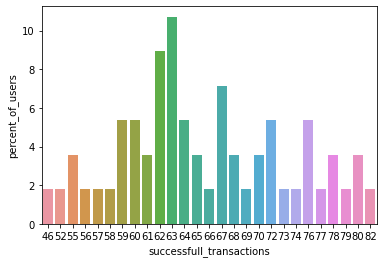

In [7]:
successfull_transaction_user = (
    transaction_data
    .query("transaction == 'successfull'")
    
    # count number of succesfull transactions made by each users
    .groupby('name', as_index = False)
    .agg({'date' : 'count'})
    .rename(columns = {'date':'successfull_transactions'})
    
    #count number of users for each number of successfull_transactions
    .groupby('successfull_transactions', as_index = False)
    .agg({'name' : 'count'})
)

# translate absolute numbers of users in 'name' column into percents of users
successfull_transaction_user['name'] = 100*successfull_transaction_user['name']/successfull_transaction_user['name'].sum()
successfull_transaction_user = successfull_transaction_user.rename(columns = {'name':'percent_of_users'})

sns.barplot(x = 'successfull_transactions', y = 'percent_of_users', data = successfull_transaction_user)

In [8]:
successfull_transaction_user.describe()

successfull_transactions  percent_of_users
count                 27.000000         27.000000
mean                  66.259259          3.703704
std                    9.333944          2.371394
min                   46.000000          1.785714
25%                   59.500000          1.785714
50%                   66.000000          3.571429
75%                   73.500000          5.357143
max                   82.000000         10.714286

In [52]:
# Task 5.6
# A colleague comes to you with some updated data. Build a summary table user_vs_minute_pivot, where:

# columns - user names
# rows - minute of transaction time (minute)
# values - number of performed operations
# Fill in the missing values with zeros.

# Note: there is no need to filter successful transactions - build a table for all

In [53]:
path_to_transaction_updated = Path(Path.cwd(), 'transaction_data_updated.csv')
df = pd.read_csv(path_to_transaction_updated)

user_vs_minute_pivot = (df
                        .groupby(['name', 'minute'], as_index = False)
                        .agg({'transaction':'count'})
                        .rename(columns = {'transaction':'transactions'})
                        .pivot(index = 'minute', columns = 'name', values = 'transactions')
                        .fillna(0)
                       )
user_vs_minute_pivot.head()

name    Ekaterina_Fedorova  Ekaterina_Ivanova  Ekaterina_Lesnova  \
minute                                                             
0                      3.0                4.0                2.0   
1                      4.0                4.0                0.0   
2                      1.0                2.0                4.0   
3                      3.0                0.0                2.0   
4                      3.0                0.0                0.0   

name    Ekaterina_Ozerova  Ekaterina_Petrova  Ekaterina_Polyanova  \
minute                                                              
0                     3.0                4.0                  4.0   
1                     4.0                2.0                  5.0   
2                     4.0                2.0                  1.0   
3                     0.0                5.0                  2.0   
4                     3.0                1.0                  1.0   

name    Ekaterina_Smirnova  Irina_Fedorova  Irina_Ivanova  Irina_Lesnova  ...  \
minute                                                                    ...   
0                      2.0             1.0            2.0            2.0  ...   
1                      4.0             4.0            4.0            3.0  ...   
2                      3.0             2.0            3.0            3.0  ...   
3                      1.0             3.0            2.0            2.0  ...   
4                      2.0             3.0            2.0            1.0  ...   

name    Svetlana_Petrova  Svetlana_Polyanova  Svetlana_Smirnova  \
minute                                                            
0                    0.0                 3.0                1.0   
1                    4.0                 5.0                3.0   
2                    4.0                 1.0                3.0   
3                    1.0                 5.0                5.0   
4                    1.0                 2.0                2.0   

name    Vasilisa_Fedorova  Vasilisa_Ivanova  Vasilisa_Lesnova  \
minute                                                          
0                     1.0               4.0               1.0   
1                     2.0               3.0               3.0   
2                     3.0               0.0               1.0   
3                     2.0               4.0               0.0   
4                     1.0               1.0               2.0   

name    Vasilisa_Ozerova  Vasilisa_Petrova  Vasilisa_Polyanova  \
minute                                                           
0                    3.0               0.0                 0.0   
1                    0.0               0.0                 3.0   
2                    2.0               1.0                 3.0   
3                    3.0               4.0                 1.0   
4                    2.0               3.0                 0.0   

name    Vasilisa_Smirnova  
minute                     
0                     1.0  
1                     2.0  
2                     1.0  
3                     0.0  
4                     1.0  

[5 rows x 56 columns]

In [54]:
df

date                name  transaction  minute
0     2020-03-02 00:37:20   Ekaterina_Petrova    cancelled      37
1     2020-03-02 00:59:09      Irina_Fedorova  successfull      59
2     2020-03-02 01:06:14  Ekaterina_Smirnova  successfull       6
3     2020-03-02 00:02:58    Lolita_Polyanova    cancelled       2
4     2020-03-02 00:17:52      Julia_Smirnova    cancelled      17
...                   ...                 ...          ...     ...
5310  2020-03-02 00:09:28   Vasilisa_Fedorova  successfull       9
5311  2020-03-02 00:46:31    Vasilisa_Ozerova  successfull      46
5312  2020-03-02 00:16:38      Olga_Polyanova  successfull      16
5313  2020-03-02 00:13:00  Ekaterina_Smirnova  successfull      13
5314  2020-03-02 01:15:45      Irina_Fedorova    cancelled      15

[5315 rows x 4 columns]

In [ ]:
# Task 5.9
# Correct your colleague's error, and count the number of minutes that have elapsed since the start of the day.
# Save the result in the true_minute column.

In [76]:
time_Zero = pd.to_datetime('2020-03-02 00:00:00')

df['true_minute'] = pd.to_datetime(df['date'])

df['true_minute'] = ((df['true_minute'] - time_Zero)
                     .dt.total_seconds()
                     /60
                    )

df['true_minute'] = df.true_minute.apply(lambda x: int(x))
df

date                name  transaction  minute  \
0     2020-03-02 00:37:20   Ekaterina_Petrova    cancelled      37   
1     2020-03-02 00:59:09      Irina_Fedorova  successfull      59   
2     2020-03-02 01:06:14  Ekaterina_Smirnova  successfull       6   
3     2020-03-02 00:02:58    Lolita_Polyanova    cancelled       2   
4     2020-03-02 00:17:52      Julia_Smirnova    cancelled      17   
...                   ...                 ...          ...     ...   
5310  2020-03-02 00:09:28   Vasilisa_Fedorova  successfull       9   
5311  2020-03-02 00:46:31    Vasilisa_Ozerova  successfull      46   
5312  2020-03-02 00:16:38      Olga_Polyanova  successfull      16   
5313  2020-03-02 00:13:00  Ekaterina_Smirnova  successfull      13   
5314  2020-03-02 01:15:45      Irina_Fedorova    cancelled      15   

      true_minute  
0              37  
1              59  
2              66  
3               2  
4              17  
...           ...  
5310            9  
5311           46  
5312           16  
5313           13  
5314           75  

[5315 rows x 5 columns]